# Advanced Regression Assignment

### Business Goal:
* A US-based housing company named Surprise Housing has decided to enter the Australian market.The company is looking at prospective properties to buy to enter the market. 
* We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
* The company wants to know:
    * Which variables are significant in predicting the price of a house
    * How well those variables describe the price of a house.

### Loading & Inspecting Dataset

In [1]:
"""Import Library"""
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
"""Read train csv"""
housing_data = pd.read_csv("/Users/anshika.joshi/Desktop/self_imp/Self_learning/Advanced_regression_assignment/train.csv")


In [3]:
"""Inspect Dataset"""
housing_data.shape

(1460, 81)

In [4]:
"""Print top 10 rows of data"""
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
"""View columns provided in dataset"""
print(housing_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Data Cleaning

**Removing variables which are not important for our analysis**

In [6]:
housing_data.drop(['Id'], axis = 1, inplace = True)

**Checking duplicate values in columns of dataset**

In [7]:
duplicate_values=(housing_data.nunique()<2).to_list()
print(sum(duplicate_values) > 1)
print("This shows, data does not have duplicate values.")

False
This shows, data does not have duplicate values.


**Checking for null values**

In [8]:
null_values=round((housing_data.isnull().sum()/len(housing_data))*100,2)
null_values = pd.DataFrame(null_values).sort_values(0, ascending=False)
null_columns = null_values[null_values[0]>10]
print(null_columns)
print('')
print("The following column contains more than 10% missing values, hence we can drop them.")

                 0
PoolQC       99.52
MiscFeature  96.30
Alley        93.77
Fence        80.75
FireplaceQu  47.26
LotFrontage  17.74

The following column contains more than 10% missing values, hence we can drop them.


**Dropping columns having having more than 10% missing values..**

In [9]:
housing_data.drop(columns=list(null_columns.index), axis =1, inplace=True)

In [10]:
print("After dropping missing valued columns, we are left with {0} columns".format(housing_data.shape[1]))

After dropping missing valued columns, we are left with 74 columns


**Checking for missing values percentage between 1-10%**

In [11]:
null_columns_between = null_values[(null_values[0]>0) &(null_values[0]<10)]
print(null_columns_between)
print('')
print("we can drop the rows having these % values")

                 0
GarageYrBlt   5.55
GarageCond    5.55
GarageType    5.55
GarageFinish  5.55
GarageQual    5.55
BsmtExposure  2.60
BsmtFinType2  2.60
BsmtCond      2.53
BsmtQual      2.53
BsmtFinType1  2.53
MasVnrArea    0.55
MasVnrType    0.55
Electrical    0.07

we can drop the rows having these % values


**Missing values Imputation/treatment**

Dropping rows with lesser % of missing values as this will not affect our analysis.

In [12]:
housing_data.dropna(axis = 0, inplace = True)
housing_data.shape

(1338, 74)

**Deriving new columns from pre-existing**

Derive new columns from YearBuilt, YearRemodAdd, GarageYrBlt & YrSold. And drop the original columns once the new columns are derived.

In [13]:
housing_data['dev_YearBuilt'] = pd.datetime.now().year - housing_data['YearBuilt']
housing_data['dev_YearRemodAdd'] = pd.datetime.now().year - housing_data['YearRemodAdd']
housing_data['dev_GarageYrBlt'] = pd.datetime.now().year - housing_data['GarageYrBlt']
housing_data['dev_YrSold'] = pd.datetime.now().year - housing_data['YrSold']

housing_data.drop(columns= ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], inplace=True)

In [14]:
housing_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,dev_YearBuilt,dev_YearRemodAdd,dev_GarageYrBlt,dev_YrSold
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,2,WD,Normal,208500,19,19,19.0,14
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,5,WD,Normal,181500,46,46,46.0,15
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,9,WD,Normal,223500,21,20,21.0,14
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,2,WD,Abnorml,140000,107,52,24.0,16
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,12,WD,Normal,250000,22,22,22.0,14


**Converting a Binary varible into numeric datatypes:**
Mapping it to 0 and 1

In [15]:
housing_data['Street'] = housing_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
housing_data['CentralAir'] = housing_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
housing_data['PavedDrive'] = housing_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)  

**Separately analysing  numerical and categorical variables**

In [16]:
numerical_df=housing_data[list(housing_data.dtypes[housing_data.dtypes!='object'].index)]
numerical_df.head()

,MSSubClass,LotArea,Street,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,dev_YearBuilt,dev_YearRemodAdd,dev_GarageYrBlt,dev_YrSold
0,60,8450,1,7,5,196.0,706,0,150,856,...,0,0,0,0,2,208500,19,19,19.0,14
1,20,9600,1,6,8,0.0,978,0,284,1262,...,0,0,0,0,5,181500,46,46,46.0,15
2,60,11250,1,7,5,162.0,486,0,434,920,...,0,0,0,0,9,223500,21,20,21.0,14
3,70,9550,1,7,5,0.0,216,0,540,756,...,0,0,0,0,2,140000,107,52,24.0,16
4,60,14260,1,8,5,350.0,655,0,490,1145,...,0,0,0,0,12,250000,22,22,22.0,14


In [17]:
categorical_df =housing_data[list(housing_data.dtypes[housing_data.dtypes=='object'].index)]
categorical_df.head()

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition
0,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
1,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD,Normal
2,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
3,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Gd,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,WD,Abnorml
4,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal


### Exploratory Data Analysis

In [18]:
def continuous_var_analysis(var,input_col,target_col):
    plt.figure(var,figsize=(15,7))
    sns.jointplot(x=input_col, y=target_col, data=housing_data[[input_col,target_col]])
    plt.show()
    
def categorical_var_analysis(var, input_col,target_col):
    plt.figure(var, figsize=(15,7))
    my_order = housing_data[[input_col,target_col]].groupby(by=[input_col])[target_col].median().sort_values(ascending=True)
    sns.boxplot(x=input_col, y=target_col, data=housing_data[[input_col,target_col]], order=my_order.index)
    plt.show()


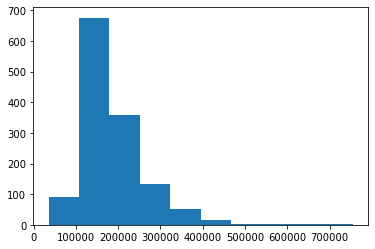

In [19]:
plt.hist(housing_data.SalePrice)
plt.show()

**Plotting continuous variables**

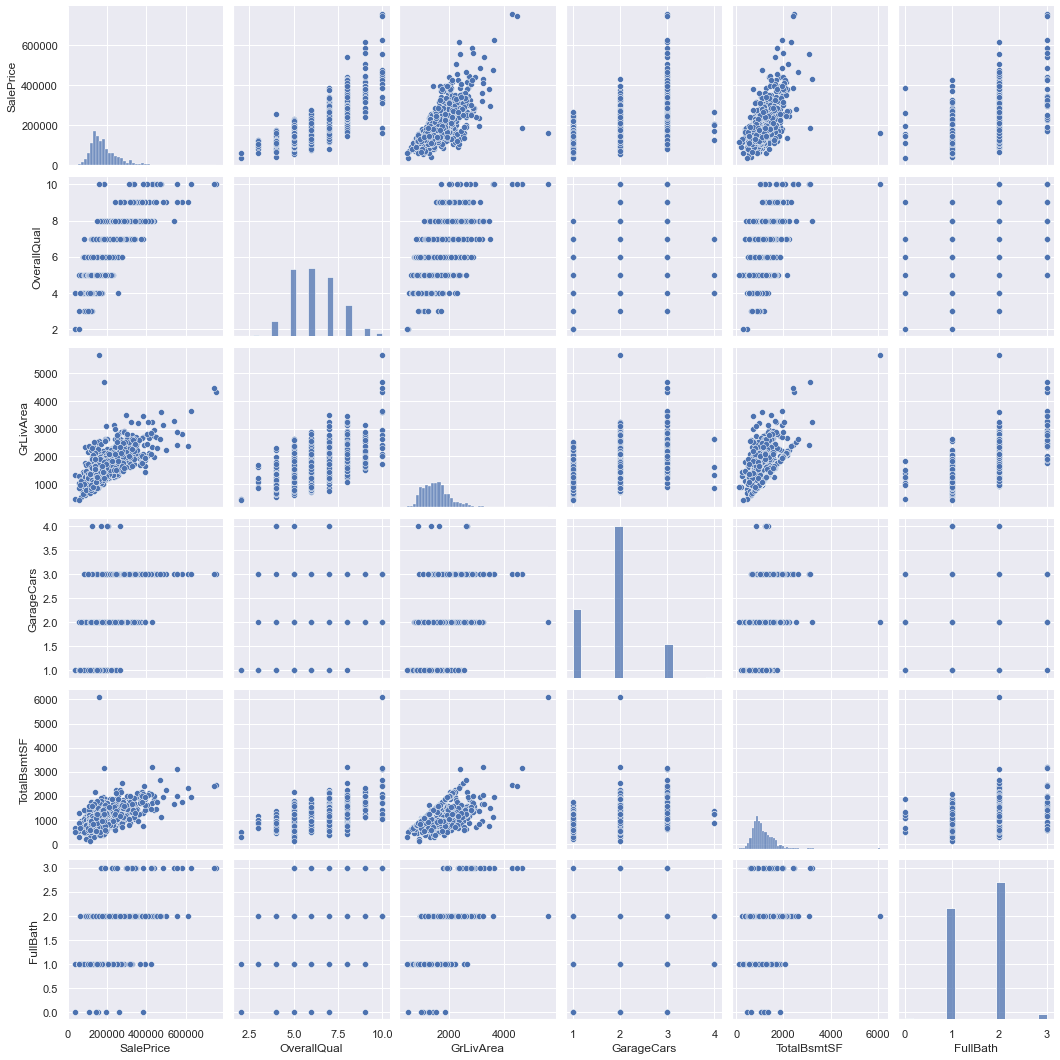

In [20]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(housing_data[cols], size = 2.5)
plt.show();

**Plotting categorical variables**

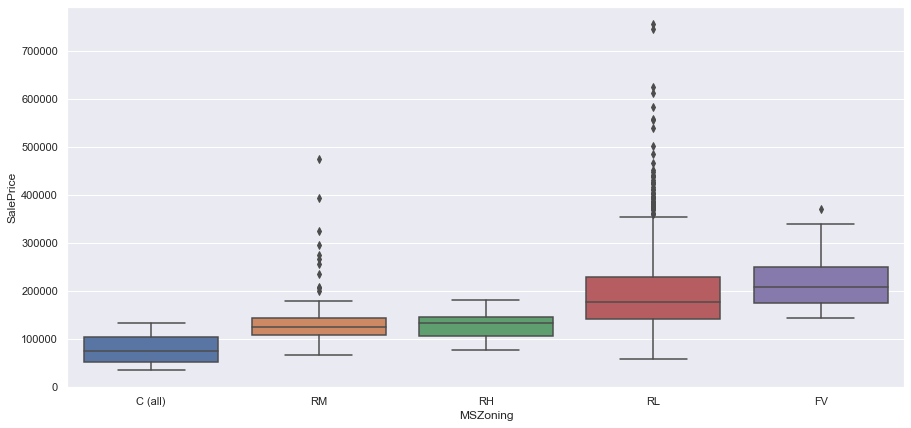

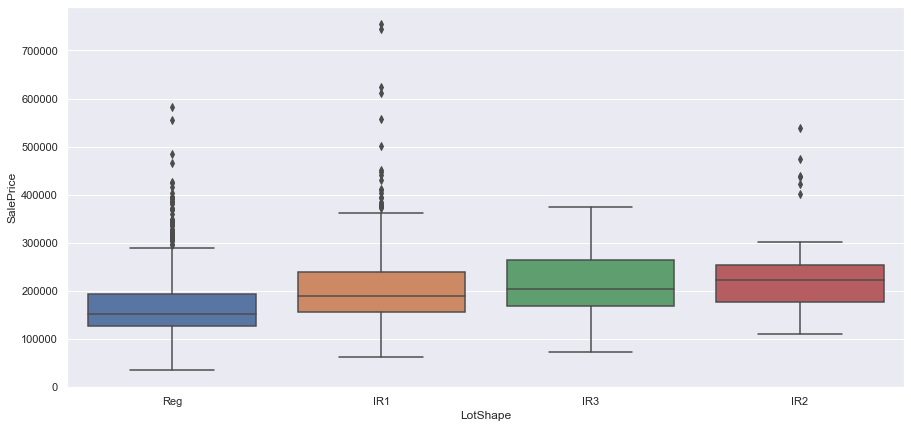

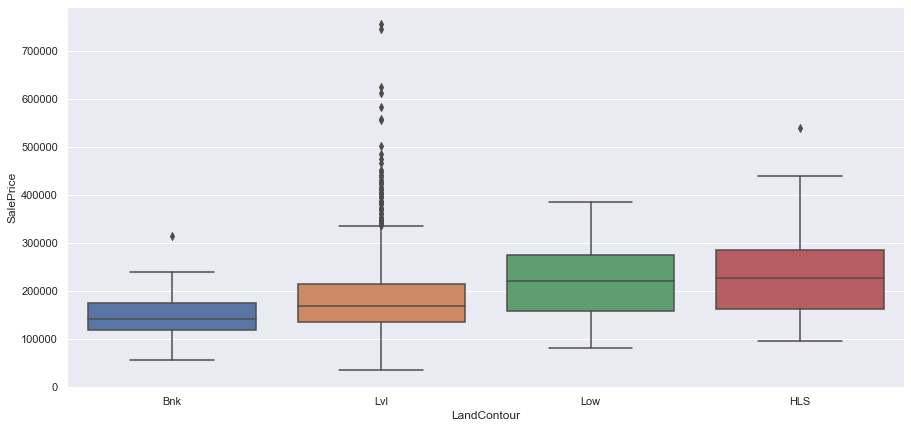

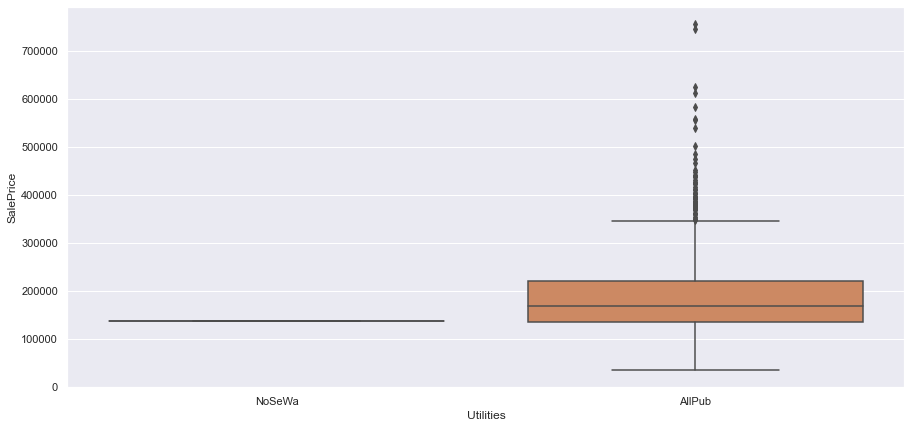

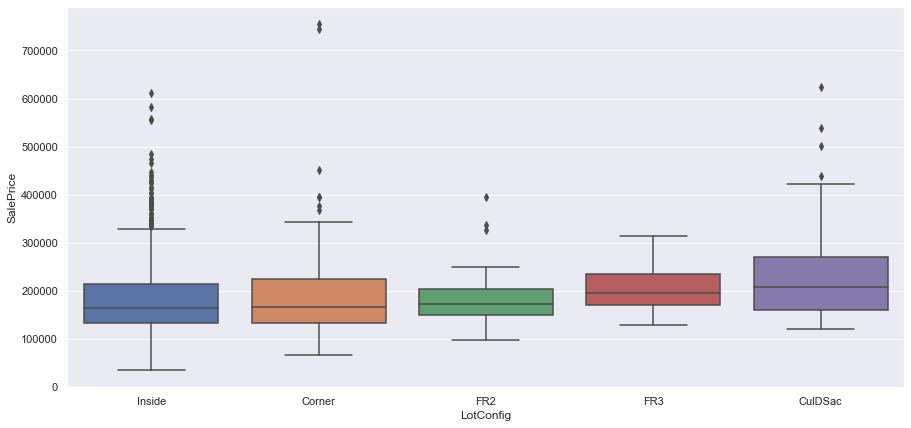

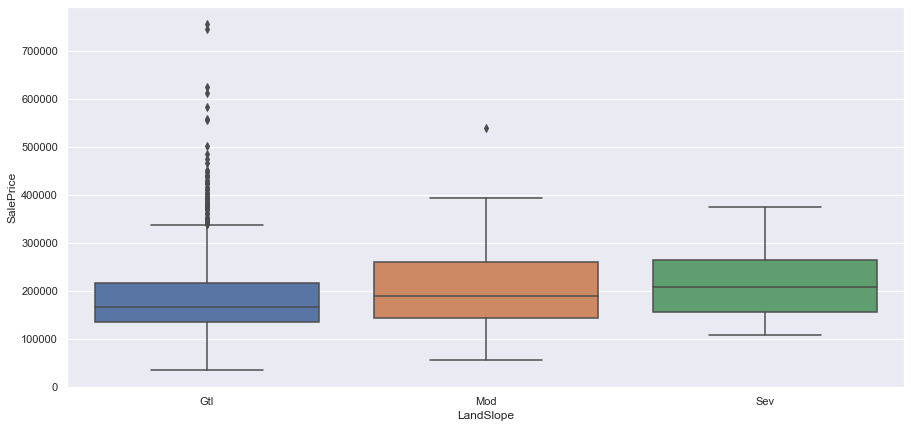

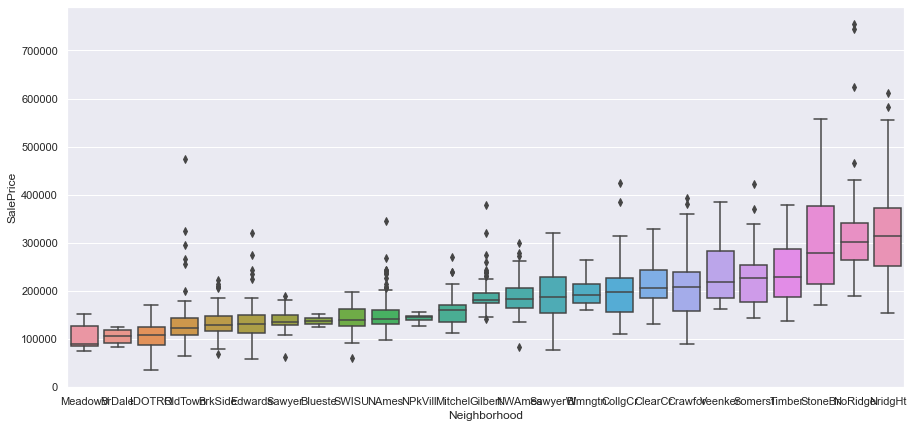

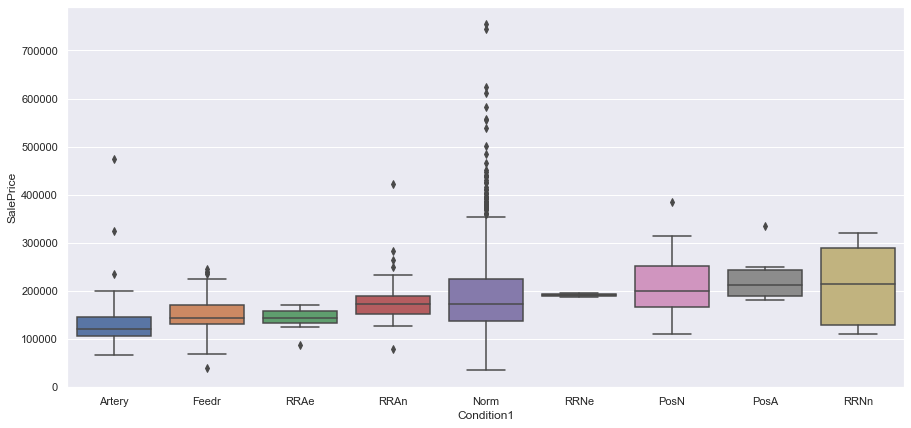

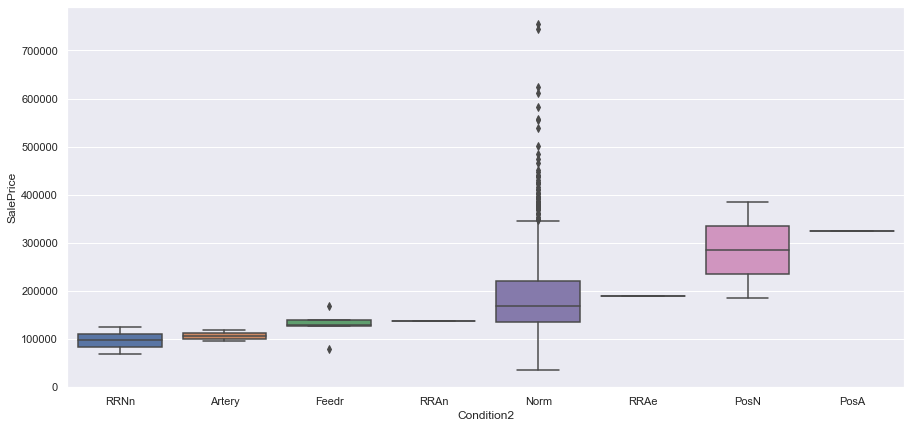

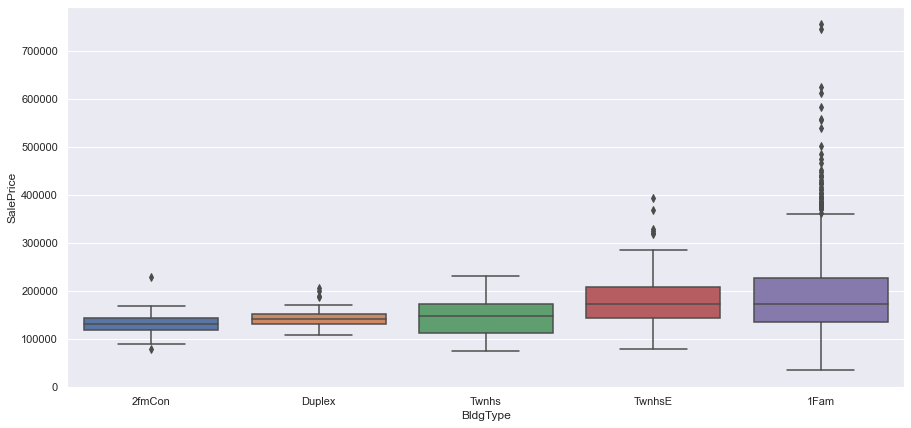

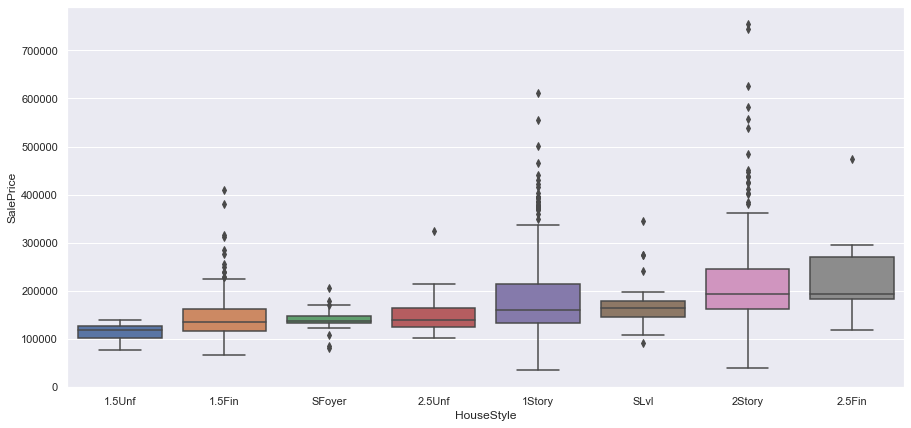

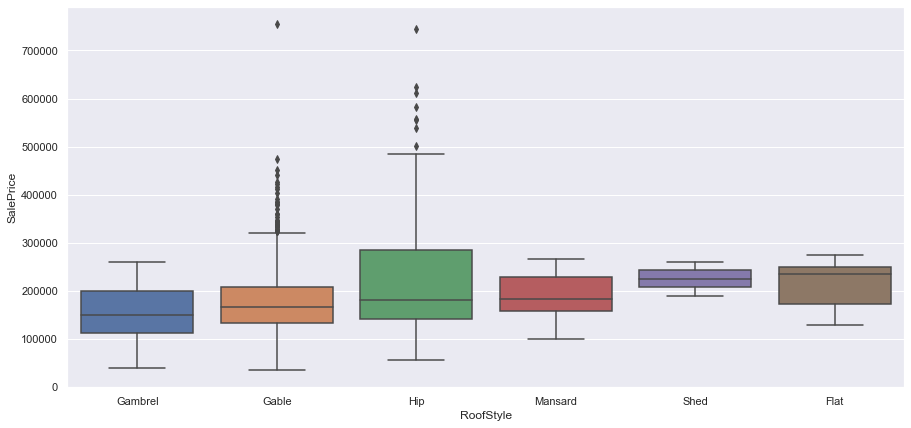

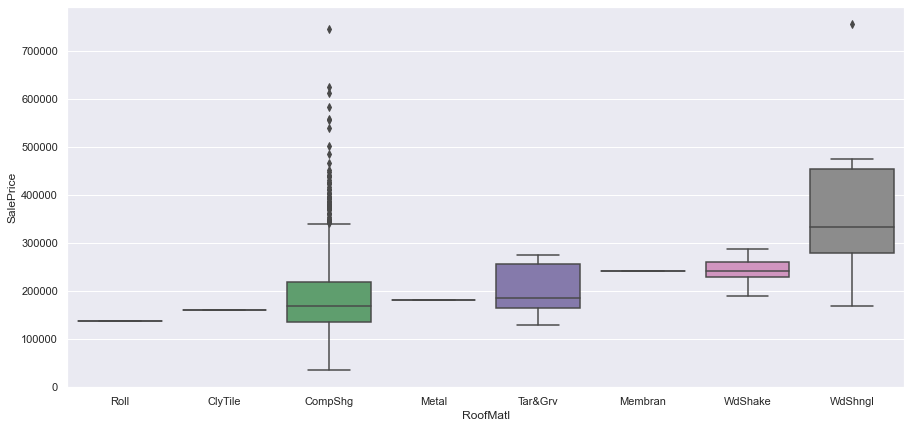

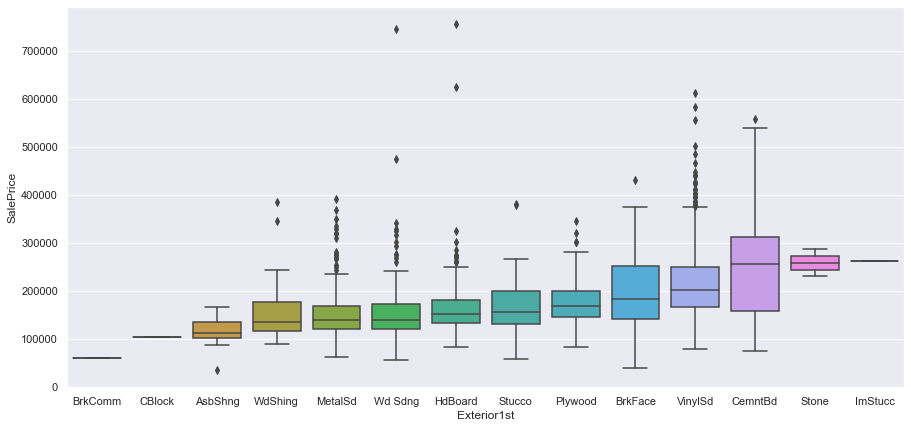

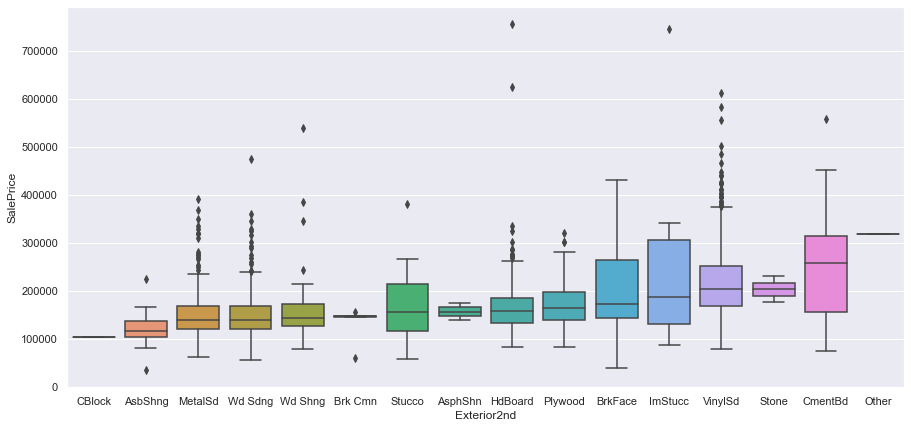

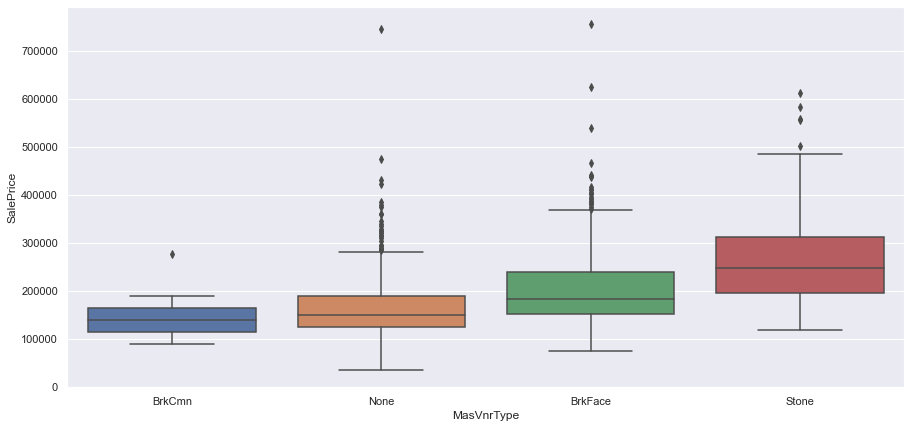

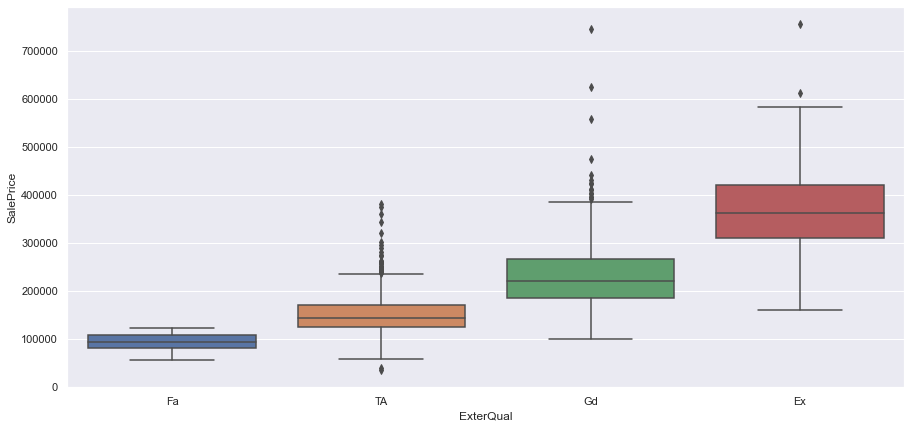

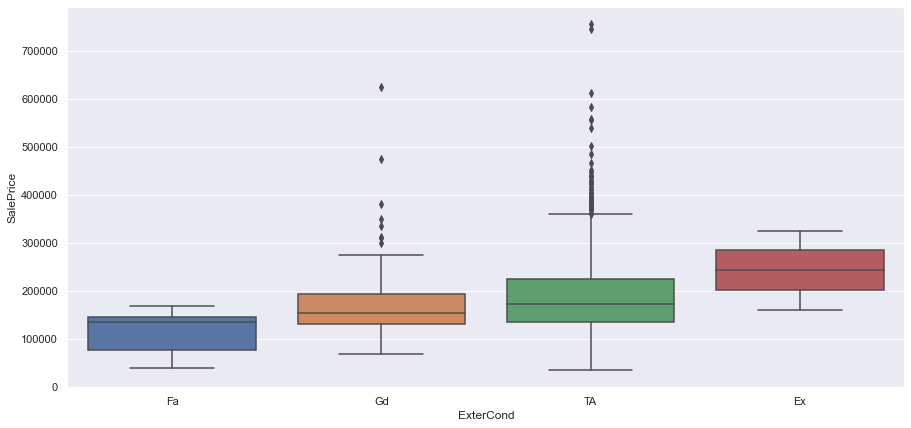

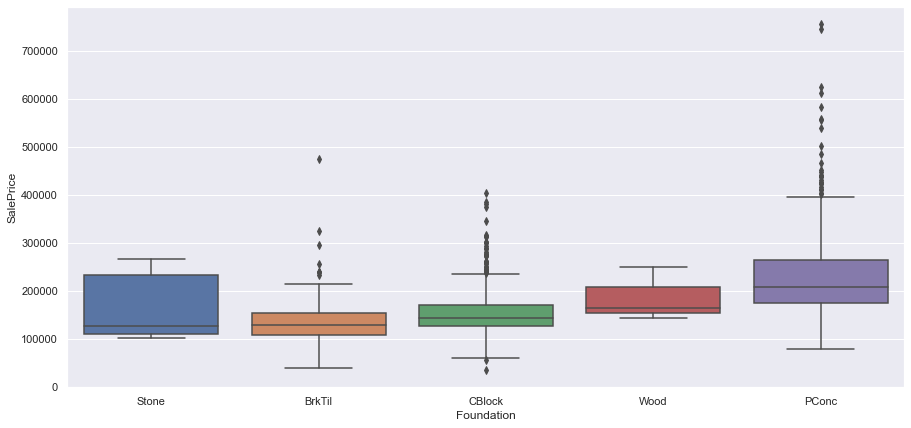

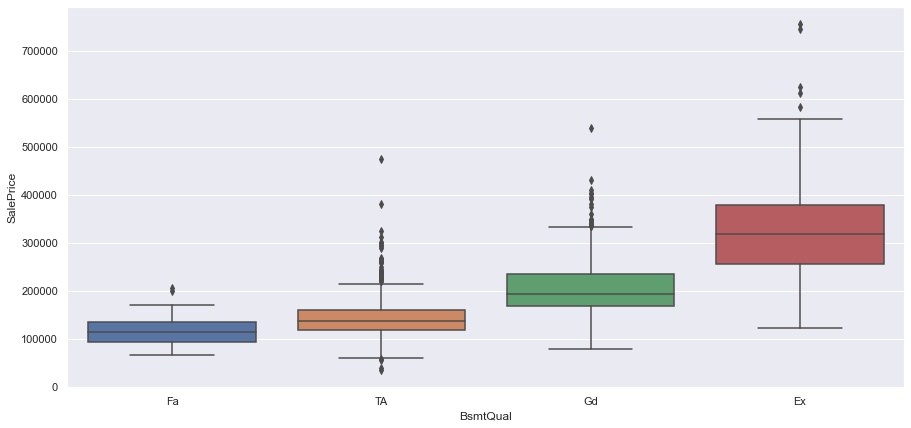

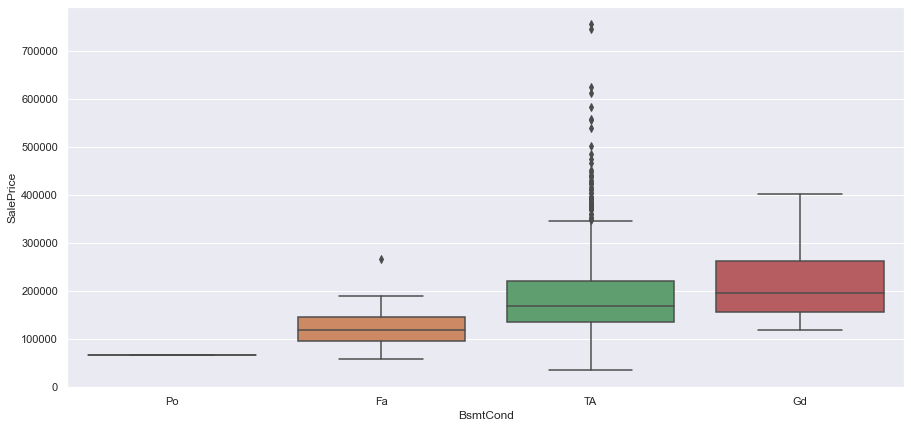

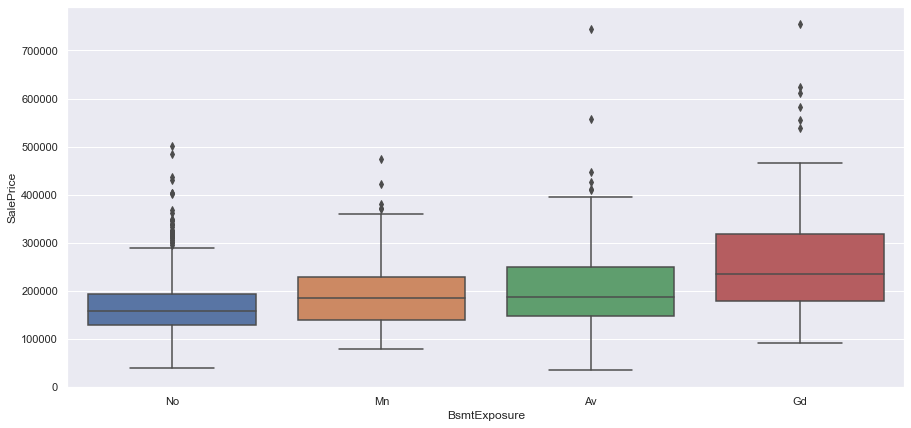

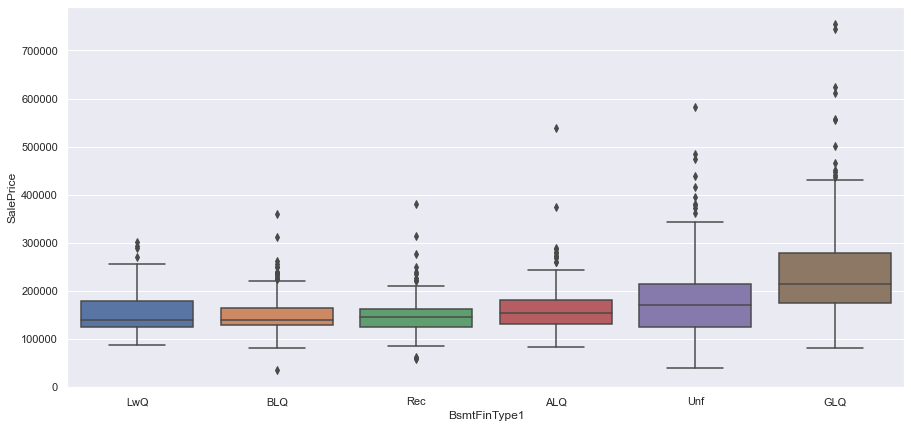

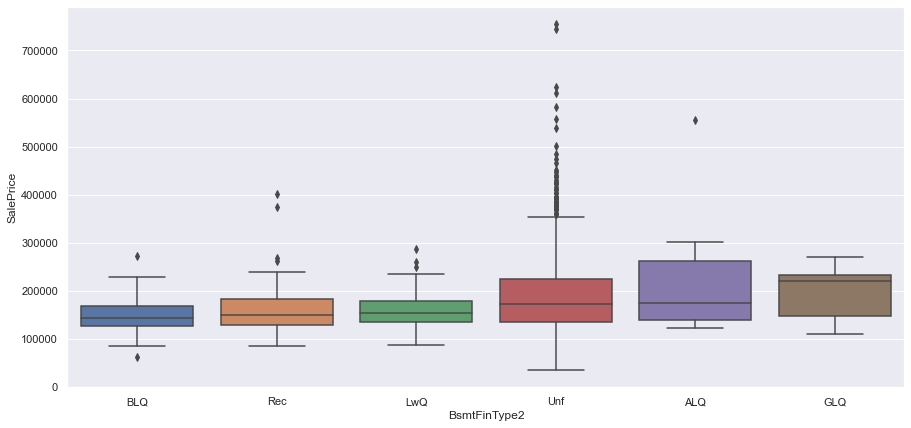

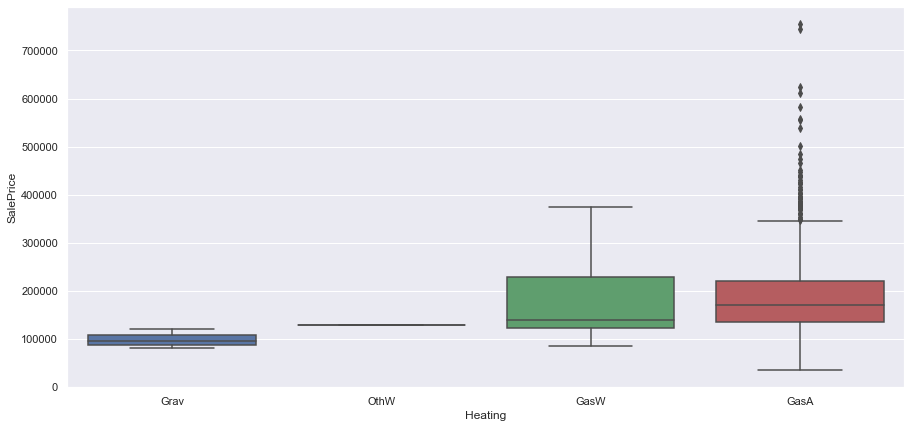

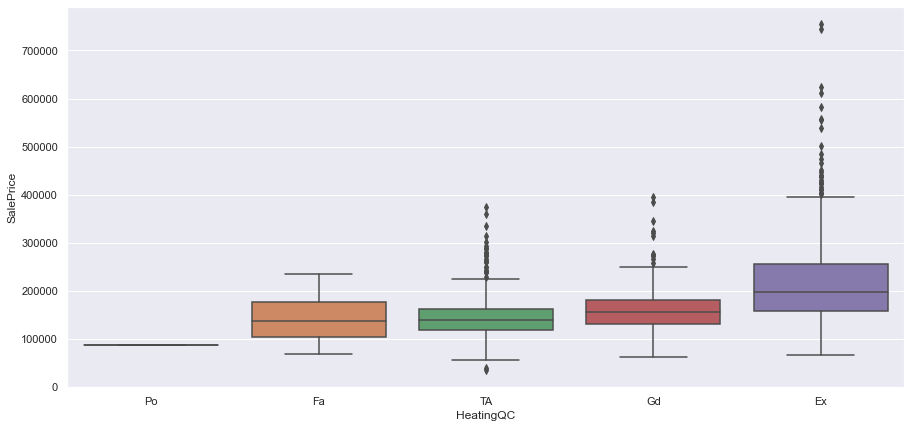

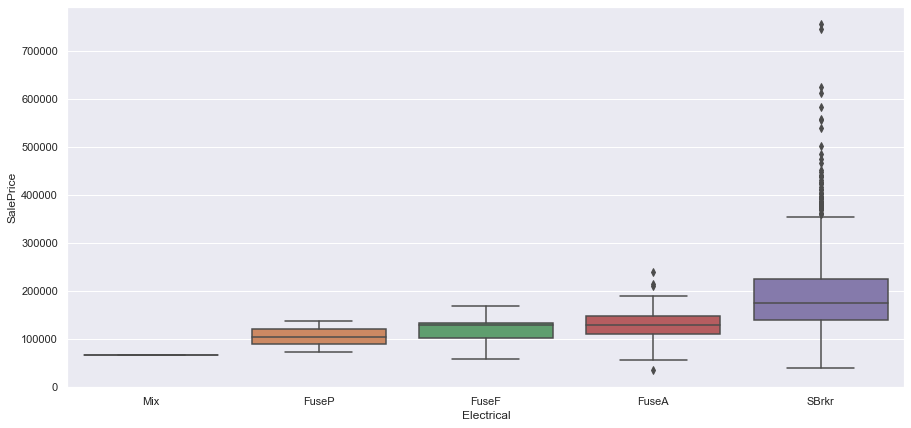

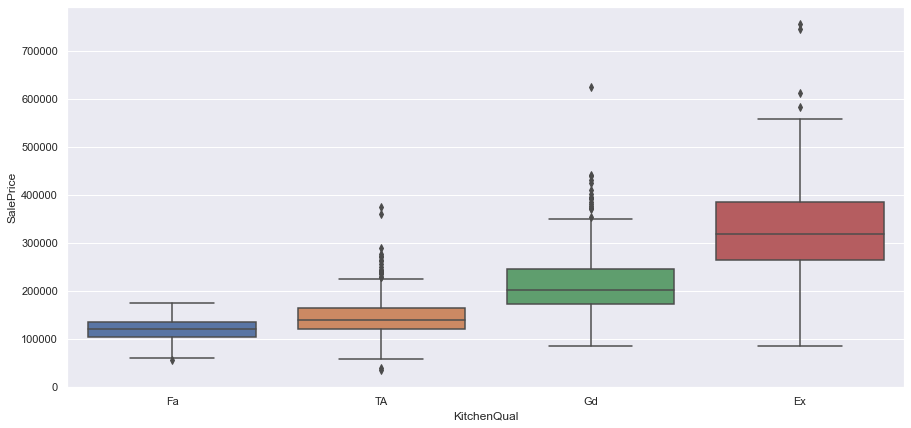

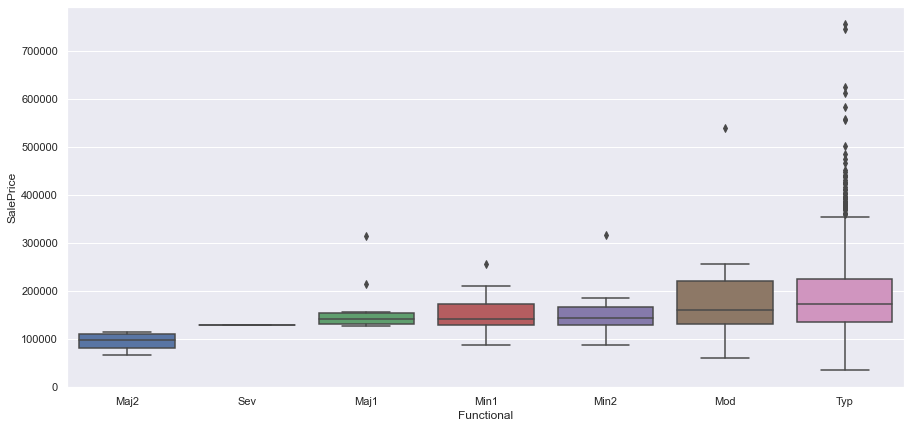

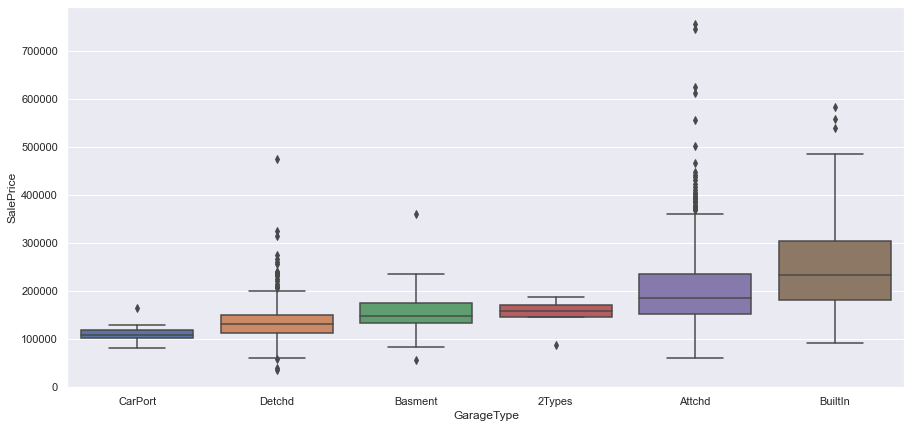

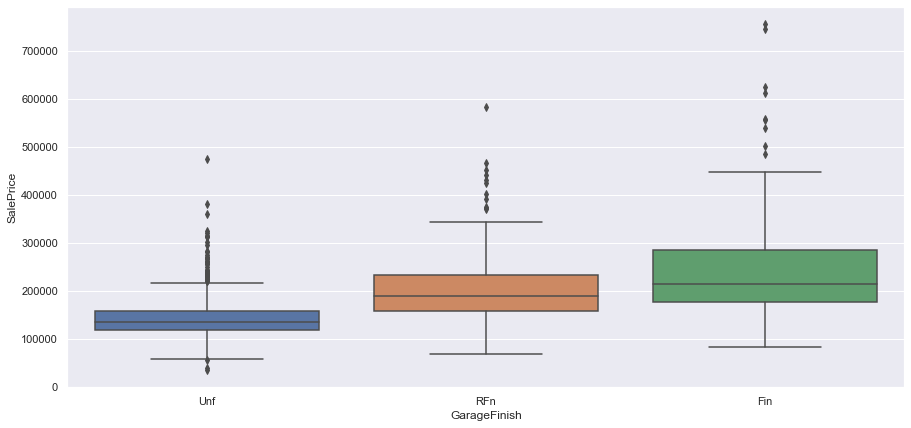

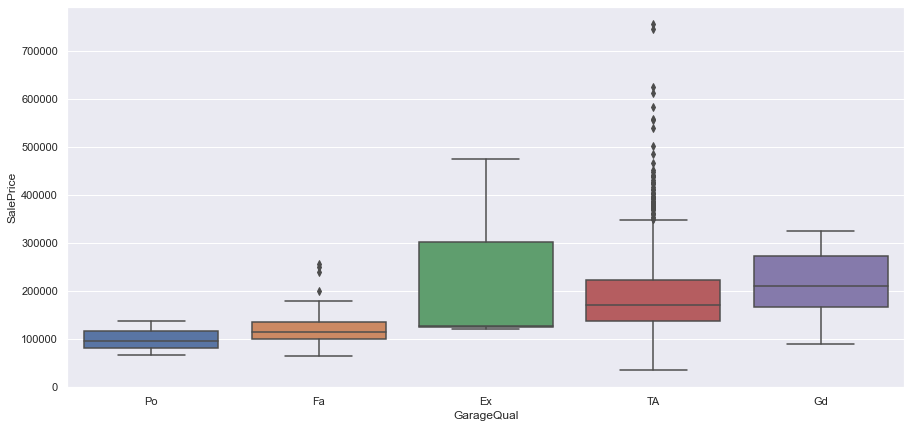

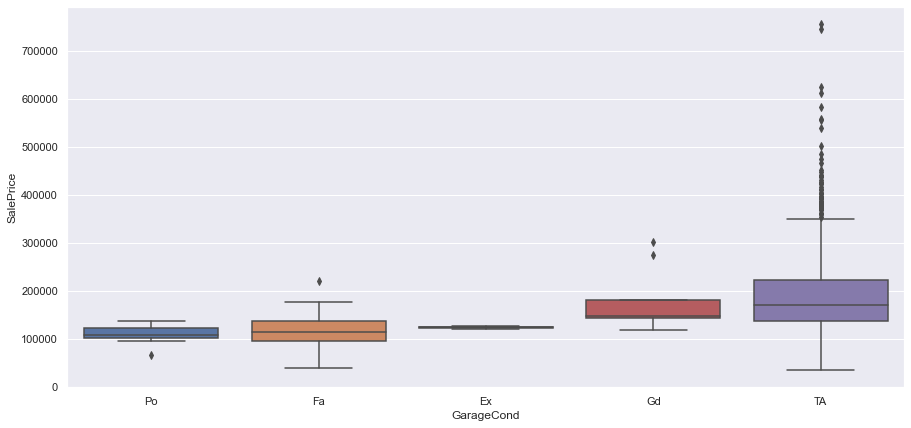

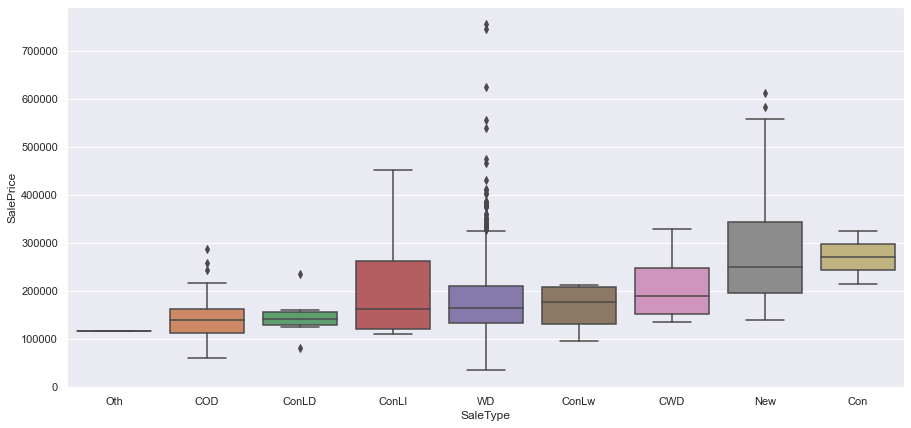

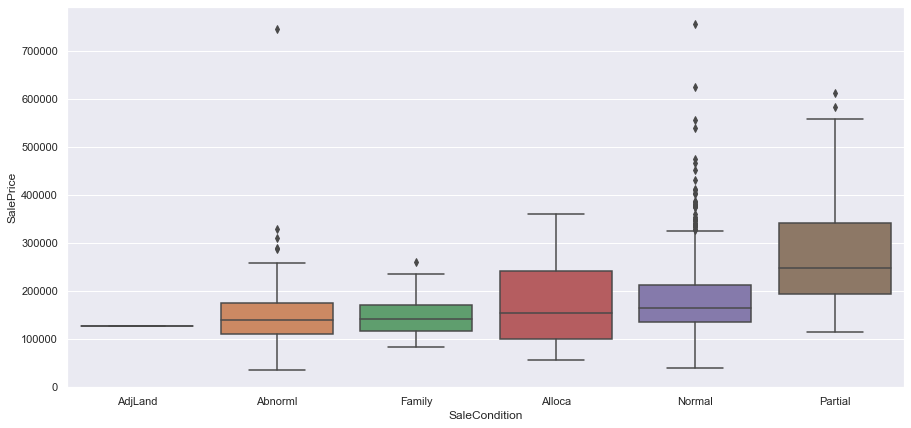

In [21]:
for var, col in enumerate(list(categorical_df.columns)):
    categorical_var_analysis(var, col, 'SalePrice')

Text(0.5, 1.0, 'Checking Correlation matrix ')

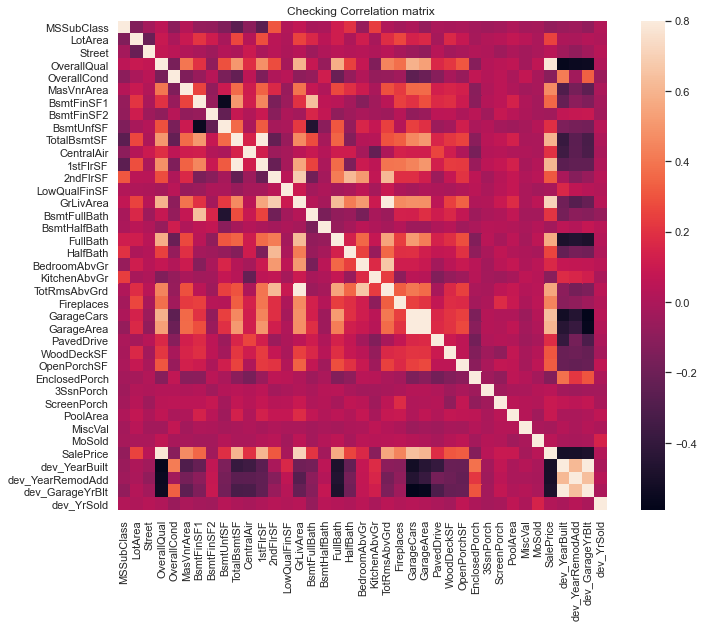

In [22]:
corrmat = housing_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

**Creating dummy variables for categorical variables**

In [23]:
data_dummies = pd.get_dummies(categorical_df, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [24]:
"""Droping the original categorical column"""
housing_data.drop(list(categorical_df.columns), axis=1, inplace=True)

"""Adding the dummy categorical column to original dataset"""
housing_data = pd.concat([housing_data,data_dummies], axis=1)

In [25]:
housing_data.MasVnrArea.fillna(housing_data.MasVnrArea.mean(),inplace=True)
housing_data.dev_GarageYrBlt.fillna(-1,inplace=True)

In [26]:
housing_data.shape

(1338, 226)

### Model building 

**Splitting data into train and test**

In [27]:
train,test = train_test_split(housing_data, train_size=0.7,test_size = 0.3, random_state=100)

In [28]:
y_train = np.log(train.SalePrice)
X_train = train.drop("SalePrice",1)

y_test= np.log(test.SalePrice)
X_test = test.drop("SalePrice",1)

In [29]:
numerical_values=X_train.select_dtypes(include=['int64','float64']).columns
numerical_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'dev_YearBuilt', 'dev_YearRemodAdd', 'dev_GarageYrBlt',
       'dev_YrSold'],
      dtype='object')

**Scaling numerical variables of the data**

We can rescale features by using following methods:

* MinMax scaling
* Standardization

In [30]:
scaler = StandardScaler()
X_train[numerical_values] = scaler.fit_transform(X_train[numerical_values])
X_test[numerical_values] = scaler.transform(X_test[numerical_values])

**Building Regression model**

In [31]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [32]:
"""Model parameters"""

def get_significant_vars(model):
    model_parameters = list(model.coef_)
    model_parameters.insert(0, reg.intercept_)
    model_parameters = [round(x, 2) for x in model_parameters]
    cols = train.columns
    cols = cols.insert(0, "constant")
    sig_vars=sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)
    return sig_vars


In [33]:
significant_var_reg = get_significant_vars(reg)

# significant_var_reg.pop(0)
for k,v in sorted(significant_var_reg, reverse = True)[:15]:
    print(f'{v:40}Score: {k}')

BsmtFinSF1                              Score: 1586617507151.34
BsmtUnfSF                               Score: 1575218628582.33
constant                                Score: 1015725859612.13
GrLivArea                               Score: 976645024005.45
BsmtFinSF2                              Score: 615002095355.53
GarageQual_Gd                           Score: 163614981319.6
Condition2_PosN                         Score: 45071126287.27
RoofMatl_WdShngl                        Score: 2787139866.93
RoofMatl_Metal                          Score: 2210248012.89
Electrical_FuseF                        Score: 642.2
GarageCond_Fa                           Score: 0.51
dev_YrSold                              Score: 0.49
MSZoning_RH                             Score: 0.48
MSZoning_FV                             Score: 0.48
MSZoning_RL                             Score: 0.46


**Calculating the RFE**

In [34]:
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

In [35]:
col=X_train.columns[rfe.support_]
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking').head(25)

,Predictor,Status,Ranking
40,MSZoning_RL,True,1
190,KitchenQual_TA,True,1
204,GarageQual_Fa,True,1
205,GarageQual_Gd,True,1
206,GarageQual_Po,True,1
207,GarageQual_TA,True,1
209,GarageCond_Gd,True,1
189,KitchenQual_Gd,True,1
188,KitchenQual_Fa,True,1
182,HeatingQC_Po,True,1


**Build statsmodel of Linear Regression Model with all the variables selected by RFE**

In [36]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

lr=sm.OLS(y_train,X_train_new)

**Model 1**

In [37]:
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     59.44
Date:                Wed, 06 Jul 2022   Prob (F-statistic):          5.97e-150
Time:                        11:10:55   Log-Likelihood:                -6.6877
No. Observations:                 936   AIC:                             55.38
Df Residuals:                     915   BIC:                             157.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.1016      0.194     62.336      0.000      11.721      12.483
MSZoning_FV              0.6610      0.133      4.966      0.000       0.400       0.922
MSZoning_RH              0.4453      0.166      2.682      0.007       0.119       0.771
MSZoning_RL              0.6816      0.128      5.330      0.000       0.431       0.933
MSZoning_RM              0.4560      0.129      3.538      0.000       0.203       0.709
Neighborhood_Edwards    -0.2019      0.037     -5.454      0.000      -0.275      -0.129
Neighborhood_MeadowV    -0.2861      0.090     -3.167      0.002      -0.463      -0.109
RoofMatl_Membran         0.4593      0.247      1.861      0.063      -0.025       0.944
Exterior1st_Stone        0.3249      0.247      1.316      0.188      -0.160       0.809
ExterQual_Fa            -0.2023      0.117     -1.729      0.084      -0.432       0.027
HeatingQC_Po            -0.3361      0.248     -1.357      0.175      -0.822       0.150
KitchenQual_Fa          -0.8051      0.072    -11.220      0.000      -0.946      -0.664
KitchenQual_Gd          -0.4357      0.033    -13.313      0.000      -0.500      -0.371
KitchenQual_TA          -0.7426      0.032    -22.873      0.000      -0.806      -0.679
Functional_Maj2         -0.2968      0.132     -2.242      0.025      -0.557      -0.037
GarageQual_Fa           -0.3847      0.150     -2.569      0.010      -0.679      -0.091
GarageQual_Gd           -0.1747      0.172     -1.013      0.311      -0.513       0.164
GarageQual_Po           -0.4846      0.236     -2.056      0.040      -0.947      -0.022
GarageQual_TA           -0.2183      0.149     -1.464      0.144      -0.511       0.074
GarageCond_Gd            0.1114      0.131      0.852      0.394      -0.145       0.368
GarageCond_TA            0.1131      0.061      1.853      0.064      -0.007       0.233
==============================================================================
Omnibus:                       40.540   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.798
Skew:                           0.180   Prob(JB):                     7.85e-23
Kurtosis:                       4.575   Cond. No.                         86.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ridge Regression

In [38]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

"""cross validation"""
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.07990829120308374


**Cross Validation results**

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007754,0.003526,0.003760,0.001454,0.0001,{'alpha': 0.0001},-0.100358,-0.075670,-0.090988,-0.080523,...,-0.090148,0.010748,26,-0.056123,-0.059922,-0.054567,-0.060748,-0.052392,-0.056750,0.003169
1,0.005807,0.000287,0.003066,0.000097,0.001,{'alpha': 0.001},-0.100277,-0.075635,-0.090967,-0.080492,...,-0.090073,0.010697,25,-0.056125,-0.059930,-0.054570,-0.060753,-0.052404,-0.056757,0.003168
2,0.005508,0.000584,0.002898,0.000348,0.01,{'alpha': 0.01},-0.099575,-0.075344,-0.090770,-0.080172,...,-0.089433,0.010294,24,-0.056179,-0.060007,-0.054604,-0.060802,-0.052517,-0.056822,0.003158
3,0.006368,0.000418,0.003214,0.000292,0.05,{'alpha': 0.05},-0.097727,-0.074965,-0.090038,-0.079004,...,-0.087945,0.009480,23,-0.056502,-0.060250,-0.054791,-0.061017,-0.052976,-0.057107,0.003097
4,0.005697,0.000449,0.003090,0.000074,0.1,{'alpha': 0.1},-0.096433,-0.074924,-0.089342,-0.077977,...,-0.087055,0.009098,22,-0.056821,-0.060463,-0.054958,-0.061285,-0.053386,-0.057383,0.003062
5,0.005864,0.000188,0.002985,0.000087,0.2,{'alpha': 0.2},-0.095031,-0.075035,-0.088397,-0.076592,...,-0.086064,0.008739,21,-0.057275,-0.060792,-0.055275,-0.061715,-0.054099,-0.057831,0.002987
6,0.005961,0.000167,0.003131,0.000123,0.3,{'alpha': 0.3},-0.094194,-0.074875,-0.087680,-0.075701,...,-0.085358,0.008571,20,-0.057679,-0.061049,-0.055571,-0.062064,-0.054719,-0.058217,0.002910
7,0.005673,0.000422,0.002896,0.000341,0.4,{'alpha': 0.4},-0.093716,-0.074677,-0.087234,-0.075048,...,-0.084878,0.008514,19,-0.058012,-0.061277,-0.055830,-0.062346,-0.055231,-0.058539,0.002848
8,0.005975,0.000207,0.002974,0.000358,0.5,{'alpha': 0.5},-0.093293,-0.074436,-0.086908,-0.074577,...,-0.084506,0.008492,18,-0.058287,-0.061468,-0.056053,-0.062575,-0.055691,-0.058815,0.002787
9,0.006039,0.000040,0.003139,0.000008,0.6,{'alpha': 0.6},-0.092919,-0.074192,-0.086618,-0.074226,...,-0.084189,0.008470,17,-0.058524,-0.061639,-0.056248,-0.062788,-0.056103,-0.059060,0.002738


**Plotting mean test and train scores with alpha**

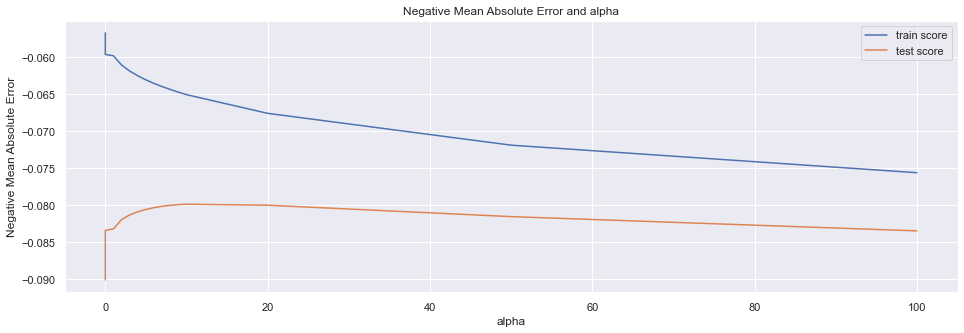

In [41]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

**Final ridge model**

In [42]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=10)

**Predict the R-squared value on train data**

In [43]:
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.9310872717579824


**Predict the R-squared value for test data**

In [44]:
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.80948217144498


In [45]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.02929454639764316

In [46]:
significant_vars_ridge=get_significant_vars(ridge)
significant_vars_ridge.pop(0)
for k,v in sorted(significant_vars_ridge, reverse = True)[:15]:
    print(f'{v:40}Score: {k}')

Neighborhood_CollgCr                    Score: 0.09
SaleCondition_Family                    Score: 0.08
Condition2_Feedr                        Score: 0.08
OverallQual                             Score: 0.07
Neighborhood_NoRidge                    Score: 0.07
Exterior1st_BrkComm                     Score: 0.07
Condition1_Feedr                        Score: 0.06
dev_YrSold                              Score: 0.05
SaleCondition_Normal                    Score: 0.05
OverallCond                             Score: 0.05
Neighborhood_Somerst                    Score: 0.05
Neighborhood_BrDale                     Score: 0.05
MSZoning_RH                             Score: 0.05
GrLivArea                               Score: 0.05
RoofMatl_WdShake                        Score: 0.04


### Lasso Regression

In [47]:
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [49]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.07940545285221963


**Final lasso model**


In [50]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

**Predict the R-squared value on train data**

In [51]:
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.9222899602124711


**Predict the R-squared value on test data**

In [52]:
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.800024786572523


In [53]:
mean_squared_error(y_test, y_test_pred)

0.030748739960774978

In [54]:
significant_vars_lasso=get_significant_vars(lasso)

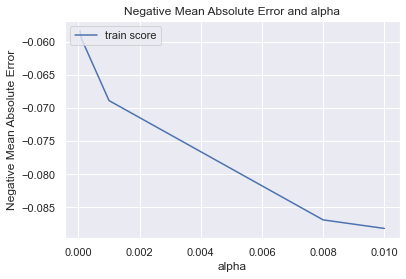

In [55]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [56]:
model_cv.best_params_

{'alpha': 10.0}

In [57]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9310872717579824
0.80948217144498


In [58]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [59]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,MSSubClass,11.786598
61,Neighborhood_Crawfor,0.086004
89,Condition2_Norm,0.082449
224,SaleCondition_Normal,0.075051
71,Neighborhood_NridgHt,0.073128
4,OverallCond,0.066478
119,Exterior1st_BrkFace,0.066088
81,Condition1_Norm,0.056754
15,BsmtFullBath,0.054523
225,SaleCondition_Partial,0.050025


In [60]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.9222899602124711
0.800024786572523


### Conclusion

**Best alpha value for Ridge : {'alpha': 10.0}**

**Best alpha value for Lasso : {'alpha': 0.001}**

**The significant Variables are:**

In [61]:
significant_vars_lasso.pop(0)
for k,v in sorted(significant_vars_lasso, reverse = True)[:15]:
    print(f'{v:40}Score: {k}')

Neighborhood_CollgCr                    Score: 0.1
GrLivArea                               Score: 0.1
SaleCondition_Normal                    Score: 0.09
OverallQual                             Score: 0.08
Neighborhood_NoRidge                    Score: 0.08
SaleCondition_Family                    Score: 0.07
OverallCond                             Score: 0.05
Neighborhood_SawyerW                    Score: 0.05
Neighborhood_BrDale                     Score: 0.05
MSZoning_RH                             Score: 0.05
Exterior1st_BrkComm                     Score: 0.05
Condition2_Feedr                        Score: 0.05
Condition1_Feedr                        Score: 0.05
dev_YrSold                              Score: 0.04
BsmtCond_TA                             Score: 0.04
